fixing the hsv boundaries so we can more reliably extract the blue grid

method:
- tighten the min/max boundaries
- review 200 images in stills-thu (removed all night images)
- write down incorrect images, see cell 'bad images' below
- display bad images, with 'digital color meter' find rgb value of grid that doesn't get included
- add rgb to threshold hsv values and recompute to hsv
- tweak min/max so that all hsv found in bad images fit in. 

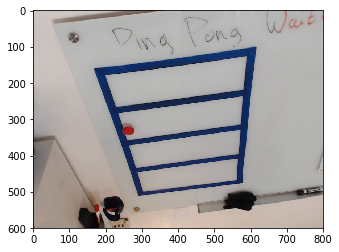

In [1]:
import cv2
cv2.__version__

import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
img = cv2.imread("frame12.png")
image = img
# test plotting
def imshow(img):  plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
imshow(img)

In [45]:
# threshold HSV image
# valid blue values measured of an image (use Digital Color Meter)
# this array is based on some reference images and points from the bad images (list below)
valid = np.array([15,37,82, 18,50,104, 11,33,74, 21,31,63, 16,40,91, 15,42,92, 11,45,102, 16,32,73, 
                  16,26,42, 13,30,59, 48,71,112, 17,54,110, 61,75,116, 62,74,111, 
                 14,53,118, 13,54,119, 51,54,87, 54,56,87], dtype=np.uint8)
valid = valid.reshape([-1, 2, 3])
cv2.cvtColor(valid, cv2.COLOR_RGB2HSV)


array([[[110, 208,  82],
        [109, 211, 104]],

       [[109, 217,  74],
        [113, 170,  63]],

       [[110, 210,  91],
        [109, 213,  92]],

       [[109, 228, 102],
        [112, 199,  73]],

       [[108, 158,  42],
        [109, 199,  59]],

       [[109, 146, 112],
        [108, 216, 110]],

       [[112, 121, 116],
        [113, 113, 111]],

       [[109, 225, 118],
        [108, 227, 119]],

       [[117, 106,  87],
        [118,  97,  87]]], dtype=uint8)

In [46]:
def tightbluemask(image, clean=True):
    hsv = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)
    threshold  = np.array([[103,95,30],[120,240,125]])
    mask = cv2.inRange(hsv, threshold[0,:], threshold[1,:])

    if clean:
        kernel = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (15, 15))
        mask = cv2.morphologyEx(mask, cv2.MORPH_CLOSE, kernel)
        kernel = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (3, 3))
        mask = cv2.morphologyEx(mask, cv2.MORPH_OPEN, kernel)
    
    return mask


# plt.imshow(tightbluemask(image))

In [ ]:
# create nice images for all files in stills-thu , resulting images are *.x.png
import glob, sys, time, os
os.system("rm stills-test/*.png")
for fn in glob.glob("stills-thu/frame*png"): 
    newname = fn.replace(".png", ".x.png").replace("stills-thu", "stills-test")
    print(newname)
    img = cv2.imread(fn)
    conv = tightbluemask(img)
    #conv3 = cv2.cvtColor(conv, cv2.COLOR_GRAY2RGB) # 182,177,240
    #supr = cv2.bitwise_and(img,img, mask=cv2.bitwise_not(conv))
    supr = img.copy()
    supr[conv>0,:] = (182,177,240) 
    both = np.concatenate([supr,conv3], axis=1)
    cv2.imwrite(newname, both)
    
# open the stills test in an images viewer or macos finder in "columns" mode.

    

stills-thu/frame72.png


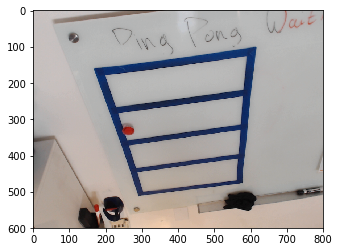

In [42]:
# bad images
bad = "stills-thu/frame1057.png stills-thu/frame107.png stills-thu/frame120.png stills-thu/frame17.png stills-thu/frame72.png".split()
fn = bad[4]
print(fn)
img = cv2.imread(fn)
imshow(img)

    

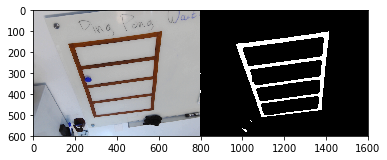

In [52]:
imshow(img)
conv = tightbluemask(img)
conv = cv2.cvtColor(conv, cv2.COLOR_GRAY2RGB)
#conv = cv2.bitwise_and(img,img, mask=cv2.bitwise_not(conv))
conv = np.concatenate([img,conv], axis=1)
plt.imshow(conv)

In [25]:
conv = conv[:,:,np.newaxis]
layer0 = np.zeros_like(conv)
conv = np.append(conv, layer0, axis=2)
conv = np.append(conv, layer0, axis=2)
conv.shape

(600, 800, 4)